In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
prev_path = "\\".join(list(os.getcwd().split('\\')[0:-1]))
if module_path not in sys.path: sys.path.append(prev_path)

from models.stat_models.linearregression import LinearRegressionModel, MultiOutputLinearRegressionModel
from models.unsupervised.pca import PcaHandler


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# pip install eikon=1.1.15
# I have put an example now in the v1 branch

In [ ]:
#import eikon as ek
# I tried ok :S

## haha, yes, you need to pip install it first 
df = pd.read_csv(os.path.join(prev_path, "models", "data", "csv", 'snp.csv'), index_col=0)
df_returns = np.log(df).diff()

df_returns.index = [dt.datetime.strptime(str(x).split(" ")[0], "%Y-%m-%d").date() for x in list(df_returns.index)]

df_returns = df_returns[1:]
snp = np.array(df_returns['^GSPC'])
df_results = df_returns.drop('^GSPC', axis=1)


In [32]:
pca_factors = pca_model.components(2)

x = np.c_[pca_factors, snp]

## single variable output

now we construct regression for ticker XOM

In [38]:
mod = LinearRegressionModel(x=x, y=np.array(df_returns["XOM"]))

show scatter plot

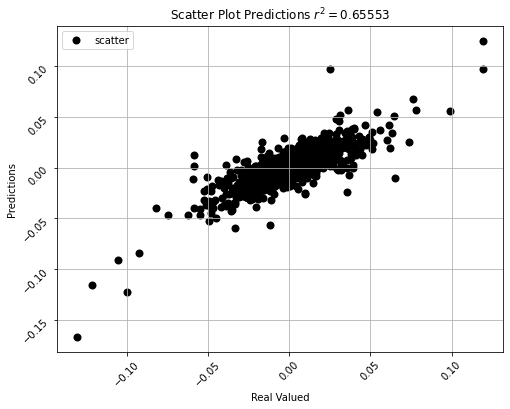

In [39]:
mod.plot()

In [59]:
np.sqrt(0.6555)

0.8096295449154508

In [35]:
mod.compute_standard_errors()

array([[0.00030037],
       [0.00450441],
       [0.00390429],
       [0.11344828]])

In [36]:
mod.t_tests()

,bot quantile:,top quantile:,Results
0,[-0.0008216363781852627],[0.00035674965389408575],Not Significant
1,[0.010023719976247425],[0.02769486653747408],Significant
2,[-0.11408171109763168],[-0.09876485127931653],Significant
3,[1.3679965201213813],[1.8130633169428867],Significant


## multi output

In [52]:
mod = MultiOutputLinearRegressionModel(x=x, y=np.array(df_returns), tickers=list(df_returns.columns))

plot a single output

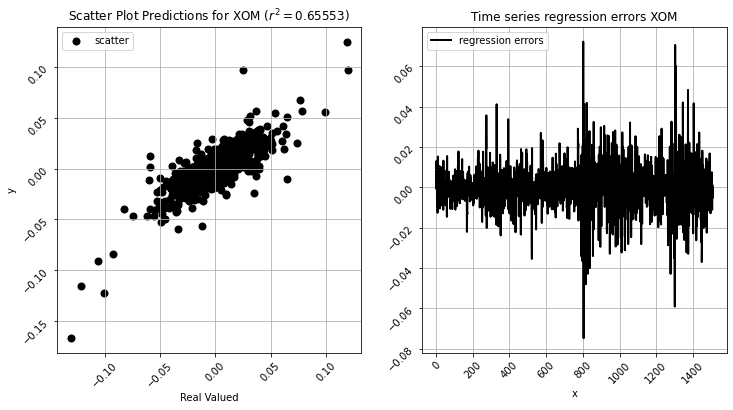

In [55]:
mod.plot_ticker('XOM')

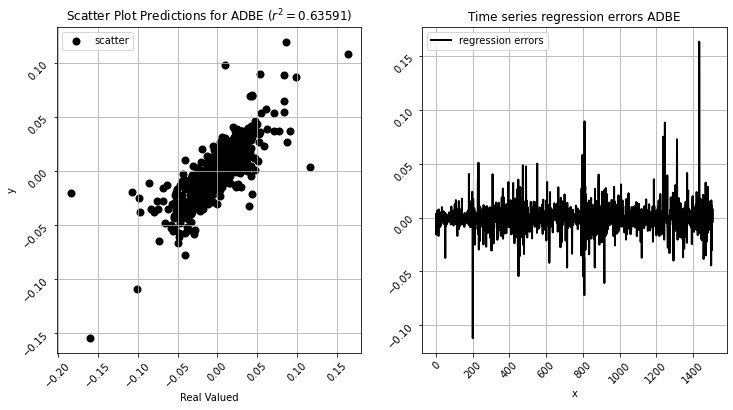

In [56]:
mod.plot_ticker('ADBE')

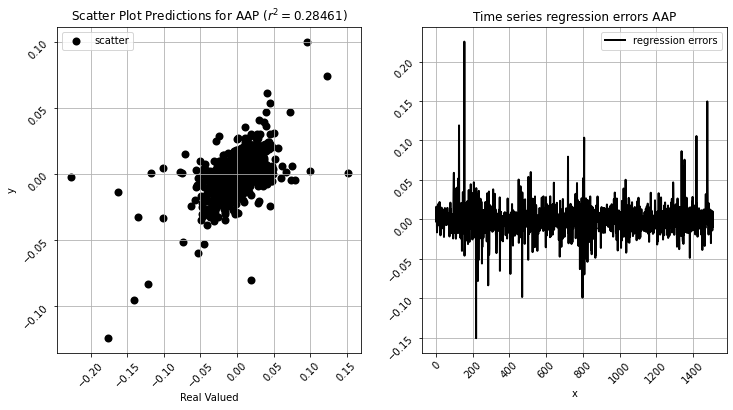

In [58]:
mod.plot_ticker('AAP')